<a href="https://www.kaggle.com/code/bhavkaur/zomato-data-analysis?scriptVersionId=133456485" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
print('Done')

Done


## **Reading CSV**

In [3]:
z_filepath = "/kaggle/input/zomato-bangalore-restaurants/zomato.csv"
z_data = pd.read_csv(z_filepath)
print("Done")

Done


In [4]:
z_data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
z_data.shape

(51717, 17)

In [6]:
z_data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

## **Dropping data that is not required**

In [7]:
z_data=z_data.drop(['url', 'phone', 'address', 'menu_item', 'dish_liked', 'reviews_list'], axis=1)
print('Done')

Done


In [8]:
z_data.info() #there are some null values since all the values are not equal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


## **Dropping Duplicates**

In [9]:
z_data.drop_duplicates(inplace=True)
print('Done')

Done


In [10]:
z_data.shape

(51609, 11)

## **Cleaning Rate Column (since we need simple float values but we is val/5)**

In [11]:
z_data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

## **Removing 'NEW','-' and /5**

In [12]:
def CorrectRate(value):
    if value == 'NEW' or value == '-':
        return np.nan
    else:
        value=str(value).split('/')
        value=value[0] # there will be a split at '/' and a list will be created where we'll be having a float and 5. We are interested in float value only which is present at index=0
        return float(value)
z_data['rate']=z_data['rate'].apply(CorrectRate)
z_data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [13]:
#To find the number of null values
z_data.rate.isnull().sum()

10019

## **Handle Null Values**

In [14]:
#we do not want null values so we will fill the null values by mean
#inplace=True means to create change in original data
z_data['rate'].fillna(z_data['rate'].mean(), inplace=True)
z_data.rate.isnull().sum()
print('Done')

Done


In [15]:
z_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [16]:
#if there are not many null values then we can use dropna
z_data.dropna(inplace=True)
print('Done')

Done


In [17]:
z_data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [18]:
z_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51042 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51042 non-null  object 
 1   online_order                 51042 non-null  object 
 2   book_table                   51042 non-null  object 
 3   rate                         51042 non-null  float64
 4   votes                        51042 non-null  int64  
 5   location                     51042 non-null  object 
 6   rest_type                    51042 non-null  object 
 7   cuisines                     51042 non-null  object 
 8   approx_cost(for two people)  51042 non-null  object 
 9   listed_in(type)              51042 non-null  object 
 10  listed_in(city)              51042 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [19]:
#we do not want long names for columns, so we will rename them
z_data.rename(columns={'approx_cost(for two people)':'Cost2people', 'listed_in(type)':'type'}, inplace=True)
z_data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2people,type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [20]:
z_data['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [21]:
z_data['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

## **listed_in(city) and location both have same values so let us keep one** 

In [22]:
z_data=z_data.drop(['listed_in(city)'], axis=1)
print('done')

done


In [23]:
z_data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2people,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [24]:
z_data['Cost2people'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

## **We want to remove comma it is restricting the values to become int or float**

In [25]:
def CorrectComma(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',', '')
        return float(value)
    else:
        return float(value)
z_data['Cost2people']=z_data['Cost2people'].apply(CorrectComma)
z_data['Cost2people'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [26]:
z_data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2people,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


****

## **Cleaning location column**

In [27]:
z_data['location'].value_counts()

BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [28]:
location=z_data['location'].value_counts(ascending=False)
LocationLessThan300 = location[location<300]

def CorrectLocation(value):
    if (value in LocationLessThan300):
        return 'others'
    else:
        return value
z_data['location']=z_data['location'].apply(CorrectLocation)
z_data['location'].value_counts()

BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

In [29]:
z_data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2people,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


## **Cleaning rest type column**

In [30]:
rest_types = z_data['rest_type'].value_counts(ascending  = False)
rest_types

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [31]:
RestLessThan1000 = rest_types[rest_types<1000]
RestLessThan1000
def CorrectRest(value):
    if(value in RestLessThan1000):
        return 'others'
    else:
        return value
        
z_data['rest_type'] = z_data['rest_type'].apply(CorrectRest)
z_data['rest_type'].value_counts()

Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

In [32]:
z_data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2people,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


## **Cleaning cuisines column**

In [33]:
cuisines = z_data['cuisines'].value_counts(ascending=True)
CuisinesLessThan100 = cuisines[cuisines<100]

def CorrectCuisines(value):
    if(value in CuisinesLessThan100):
        return 'others'
    else:
        return value
        
z_data['cuisines'] = z_data['cuisines'].apply(CorrectCuisines)
z_data['cuisines'].value_counts()

others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

In [34]:
z_data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2people,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


# ****Data is clean, now visualizing the data****

## **Count plot for variuos locations**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Old Airport Road'),
  Text(19, 0, 'Indiranagar'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Frazer Town'),
  Text(22, 0, 'MG Road'),
  Text(23, 0, 'Brigade Road'),
  Text(24, 0, 'Lavelle Road'),
  Text(25, 0, 'Church Street'),
  

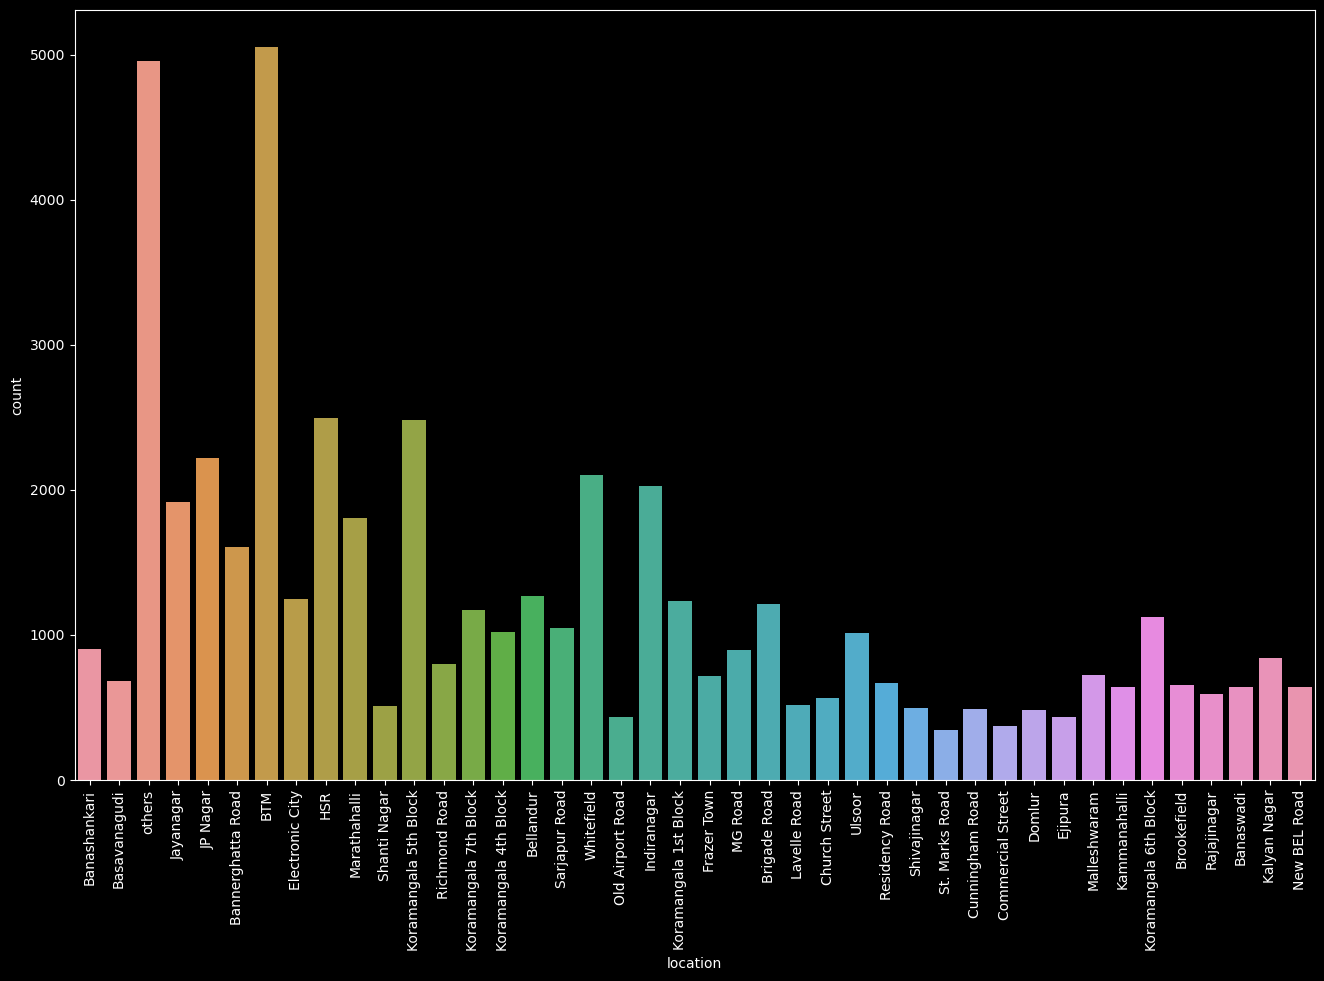

In [35]:
plt.figure(figsize = (16,10))
ax = sns.countplot(data=z_data, x=z_data['location'])
plt.xticks(rotation=90) #for clear x axis

From above, we conclude that new rest at btm shd not be opened since it is alr4eady having many res. However, rest at commercial street could be opened.

## **Visualising online order**

<Axes: xlabel='online_order', ylabel='count'>

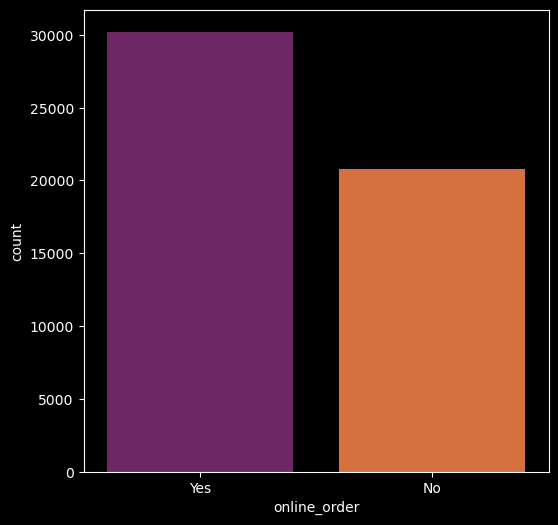

In [36]:
plt.figure(figsize=(6,6))
sns.countplot(data = z_data, x=z_data['online_order'],palette='inferno' )

## **Visualise book table**

<Axes: xlabel='book_table', ylabel='count'>

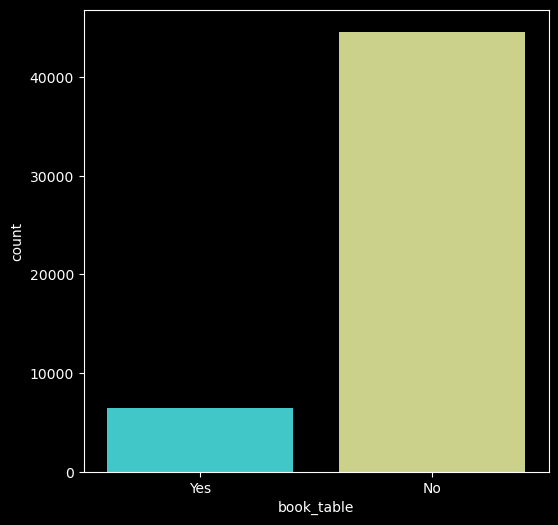

In [37]:
plt.figure(figsize=(6,6))
sns.countplot(data=z_data, x=z_data['book_table'], palette='rainbow')

## **Visualising online order and rate**

<Axes: xlabel='online_order', ylabel='rate'>

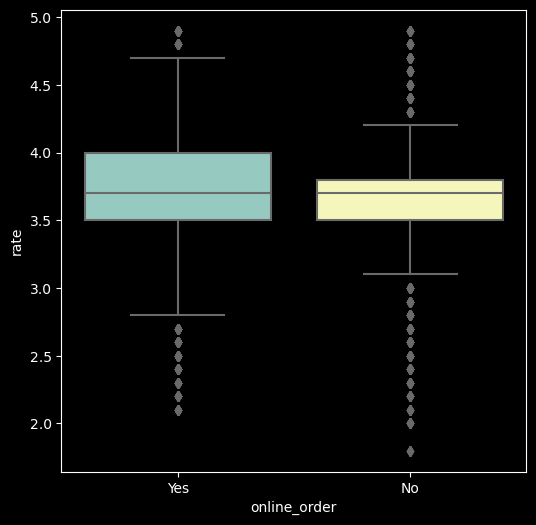

In [38]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=z_data)

## **Visualizing Book Table vs Rate**

<Axes: xlabel='book_table', ylabel='rate'>

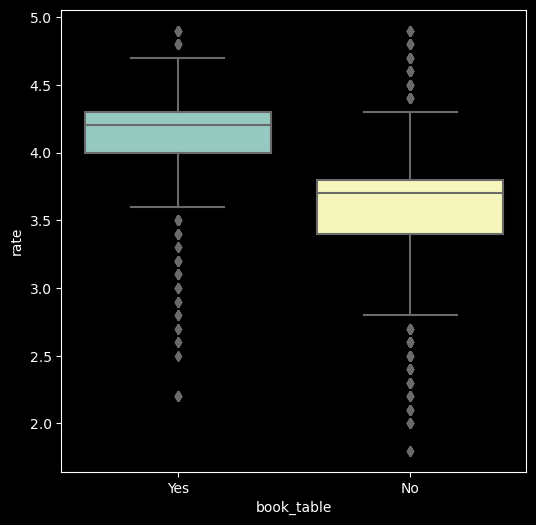

In [39]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = z_data)

## **Visualizing Online Order Facility Location Wise**

In [43]:
z_data1 = z_data.groupby(['location','book_table'])['name'].count()
z_data1.to_csv('LocationBookTable.csv')
z_data1 = pd.read_csv('LocationBookTable.csv')
z_data1 = pd.pivot_table(z_data1, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
z_data1

name     
book_table               No  Yes
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               632    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Brigade Road           1034  176
Brookefield             582   74
Church Street           385  181
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  427   55
Ejipura                 433    0
Electronic City        1148   98
Frazer Town             706    8
HSR                    2277  217
Indiranagar            1578  448
JP Nagar               1903  315
Jayanagar              1637  279
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1787  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  162
Lavelle Road            290  228
MG Road                 546  347
Malleshwaram            632   89
Marathahalli           1642  163
New BEL Road            588   56
Old Airport Road        378   59
Rajajinagar             550   41
Residency Road          522  149
Richmond Road           687  116
Sarjapur Road           893  154
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          219  124
Ulsoor                  834  177
Whitefield             1852  253
others                 4587  367

<Axes: xlabel='location'>

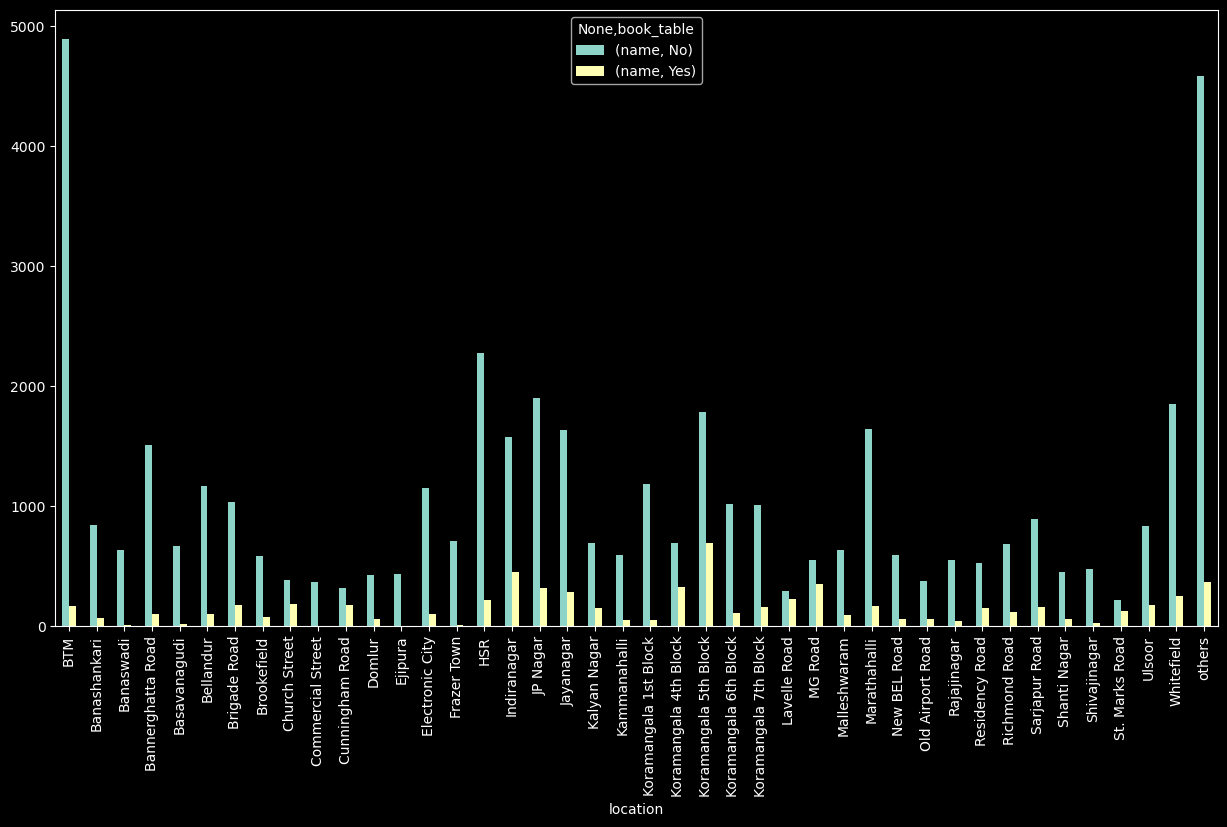

In [45]:
z_data1.plot(kind = 'bar', figsize = (15,8))